In [5]:
df<-read.csv('d:/data/wine/winequality-red2.csv')
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


In [6]:
library(dplyr)
df<-df %>% select(-quality)
dim(df)
head(df)

[1] 1599   12

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


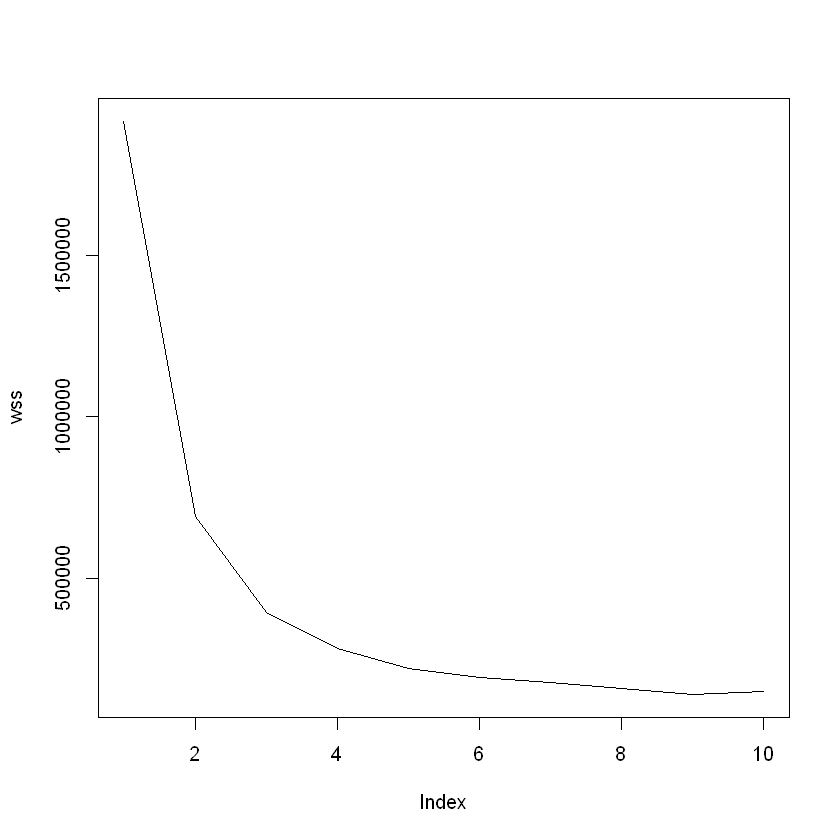

In [11]:
#wss : 클러스터 내 총 제곱함(작을수록 군집화가 잘 된 것임)
result<-NULL
for (k in 1:10){
    result[[k]]<-kmeans(df[,-12],k)
}
wss<-numeric(10)
for(k in 1:10){
    wss[k]<-result[[k]]$tot.withinss
}
plot(wss,type='l') #엘보우 포인트 확인

[1] 0.603422

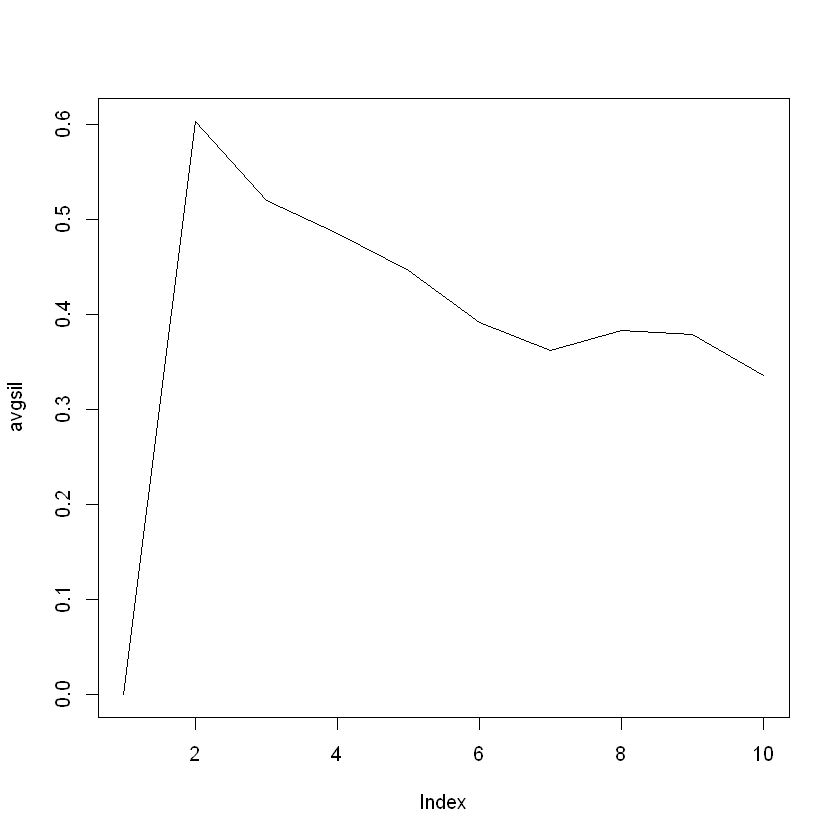

In [12]:
#실루엣 포인트(최대값 1, 클수록 군집화가 잘 된 것임)
library('cluster')
avgsil<-numeric(10)
for(k in 2:10){
    si<-summary(silhouette(result[[k]]$cluster,dist(df[,-12])))
    avgsil[k]<-si$avg.width
}
max(avgsil)
plot(avgsil,type='l')

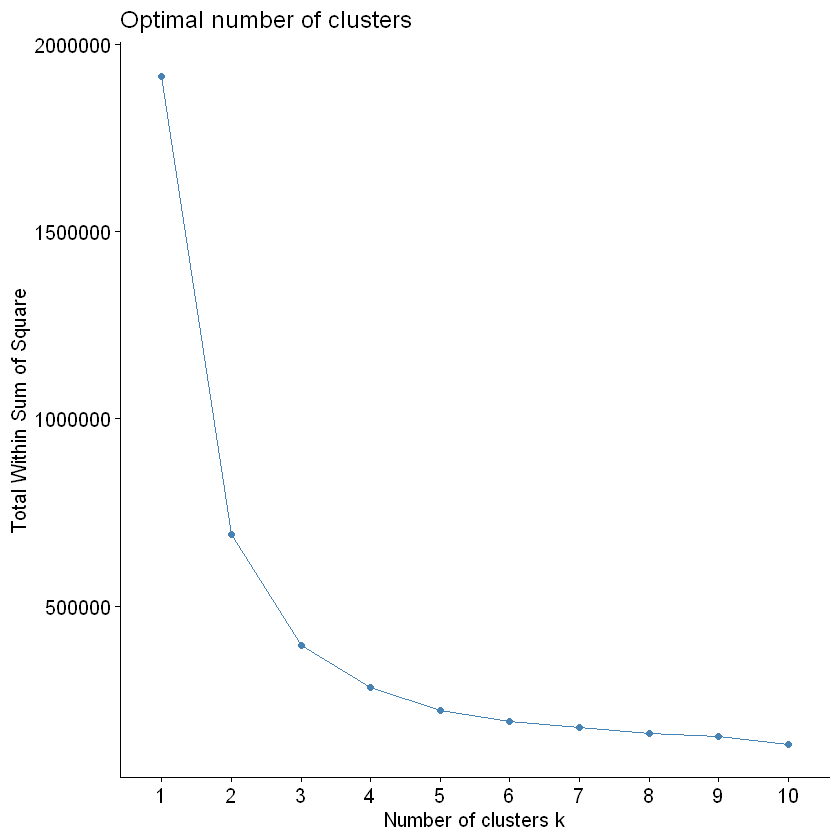

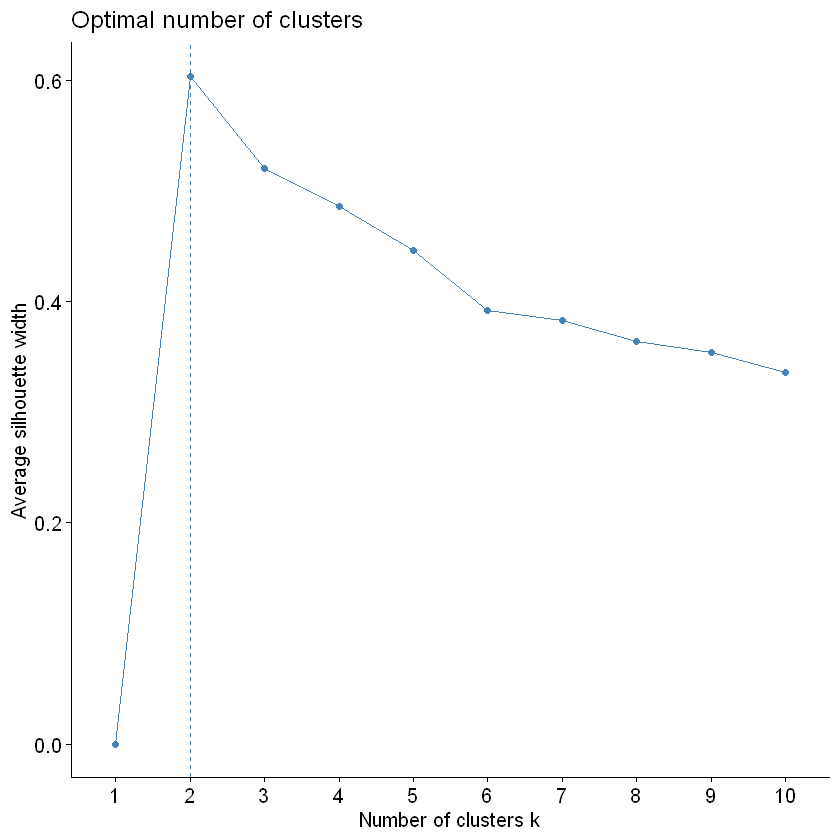

In [14]:
library(factoextra)
#wss 기준 시각화
fviz_nbclust(df[,-12],FUN=kmeans,method='wss')
#실루엣 포인트 기준 시각화
fviz_nbclust(df[,-12],FUN=kmeans,method='silhouette')

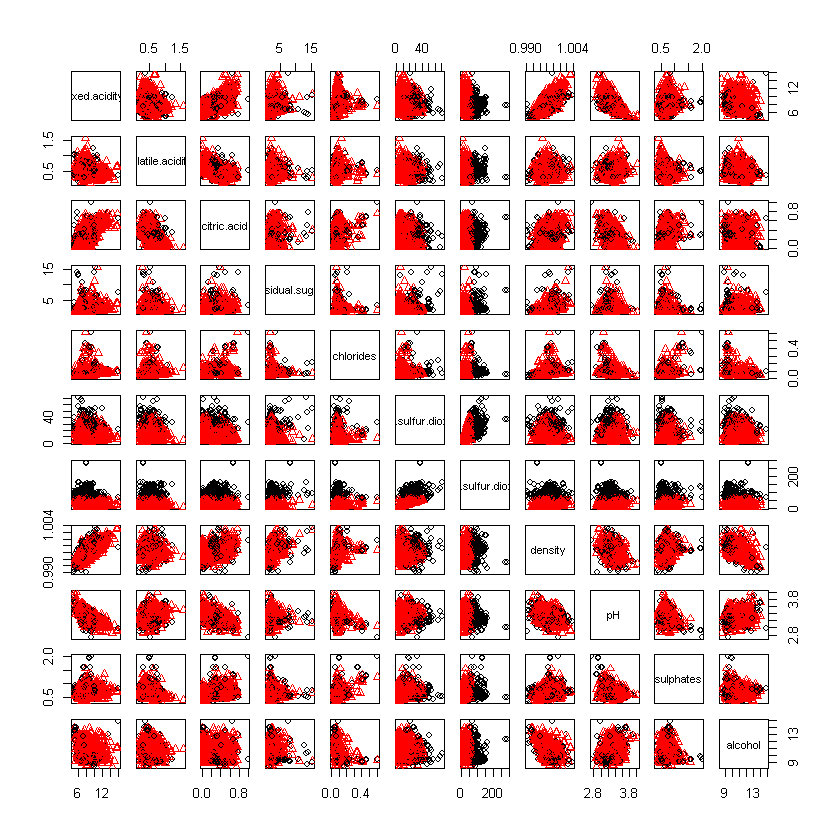

In [15]:
#산점도 행렬(군집갯수:2)
plot(df[,-12],pch=result[[2]]$cluster,col=result[[2]]$cluster)

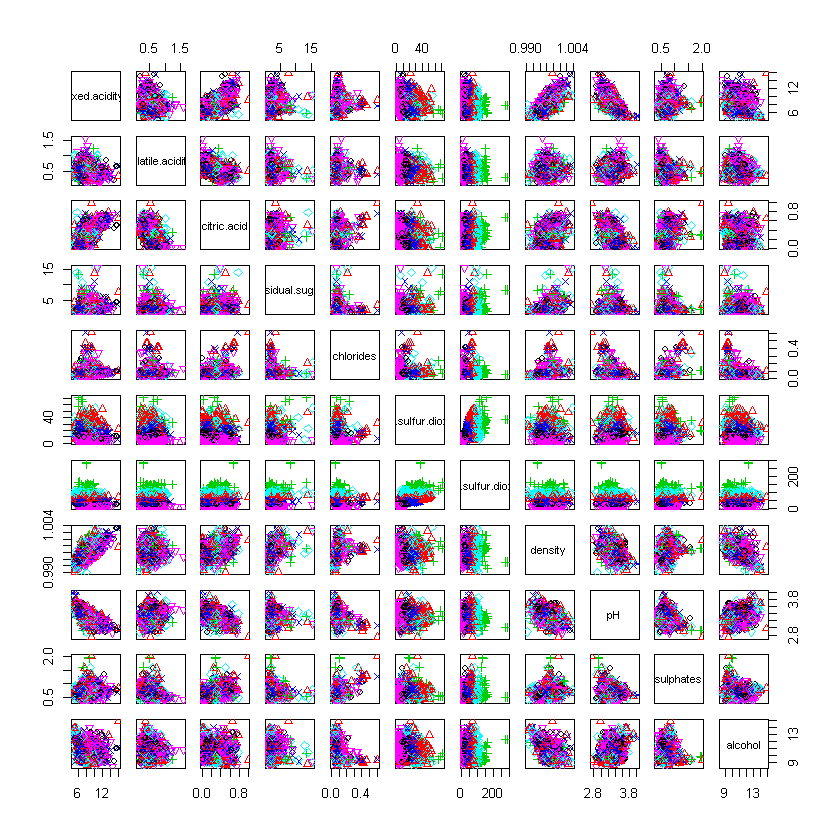

In [16]:
#산점도 행렬(군집갯수:6)
plot(df[,-12],pch=result[[6]]$cluster,col=result[[6]]$cluster)

In [17]:
#군집갯수를 2로 설정한 모형
set.seed(123)
model<-kmeans(df[,-12],centers=2) #centers 군집갯수
model #모형의 정보
model$centers #중심좌표 정보

K-means clustering with 2 clusters of sizes 420, 1179

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      8.025952        0.5516429   0.2834286       2.944524 0.09313810
2      8.424258        0.5193342   0.2665394       2.394275 0.08544614
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            25.70833             91.72857 0.9969427 3.298738 0.6626905
2            12.37193             30.34436 0.9966768 3.315522 0.6565310
   alcohol
1 10.09389
2 10.54022

Clustering vector:
   [1] 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 2 2 1 1 2 1 2 2 2 2 2 2 1 2 1 1 2 2 2
  [38] 2 2 1 1 2 2 2 2 1 1 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1 1 2
  [75] 1 2 2 2 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2
 [112] 1 1 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 1 1 1 2 1 2 1 1 1 1
 [149] 2 2 2 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2
 [186] 1 1 2 1 1 1 2 1 2 2 1 2 2 1 2 2 1 2 

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
8.025952,0.5516429,0.2834286,2.944524,0.09313810,25.70833,91.72857,0.9969427,3.298738,0.6626905,10.09389
8.424258,0.5193342,0.2665394,2.394275,0.08544614,12.37193,30.34436,0.9966768,3.315522,0.6565310,10.54022


In [22]:
head(model$cluster-1)
head(df$class)

[1] 1 0 1 1 1 1

[1] 0 0 0 1 0 0

In [23]:
#model$cluster 모형에서 예측한 값
#숫자형을 팩터형으로 변경
df$cluster<-as.factor(model$cluster-1)

In [24]:
#예측 정확도
table(df$class, df$cluster)
mean(df$class == df$cluster)

   
      0   1
  0 272 472
  1 148 707

[1] 0.6122577